# Logistic Regression

## Importing the libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [45]:
!wget https://raw.githubusercontent.com/coyoacan/Practice-in-Colab/refs/heads/main/source-files/Social_Network_Ads.csv
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, -1].values

--2024-10-18 00:07:50--  https://raw.githubusercontent.com/coyoacan/Practice-in-Colab/refs/heads/main/source-files/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10930 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0.001s  

2024-10-18 00:07:50 (10.9 MB/s) - ‘Social_Network_Ads.csv’ saved [10930/10930]



Lets look at X and Y really fast

In [46]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


## Splitting the dataset into the Training set and Test set

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)

In [48]:
print(X_train[:10])

[[    44. 139000.]
 [    30.  62000.]
 [    40.  57000.]
 [    36. 118000.]
 [    28.  37000.]
 [    50.  44000.]
 [    18.  68000.]
 [    29.  80000.]
 [    41.  72000.]
 [    36. 144000.]]


In [49]:
print(y_train[:10])

[1 0 0 1 0 0 0 0 0 1]


In [50]:
print(X_test[:10])

[[    42. 108000.]
 [    24.  58000.]
 [    36.  75000.]
 [    30.  87000.]
 [    41.  87000.]
 [    49.  28000.]
 [    48. 138000.]
 [    37.  71000.]
 [    59.  88000.]
 [    33.  69000.]]


In [51]:
print(y_test[:10])

[1 0 0 0 1 1 1 0 1 0]


## Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
print(X_train[:10])

[[ 0.59531408  1.95866234]
 [-0.71170063 -0.23323283]
 [ 0.22188131 -0.37556368]
 [-0.15155147  1.36087275]
 [-0.89841702 -0.9448871 ]
 [ 1.15546324 -0.74562391]
 [-1.83199895 -0.0624358 ]
 [-0.80505882  0.27915825]
 [ 0.3152395   0.05142888]
 [-0.15155147  2.1009932 ]]


In [54]:
print(X_test[:10])

[[ 0.40859769  1.07621104]
 [-1.27184979 -0.34709751]
 [-0.15155147  0.1368274 ]
 [-0.71170063  0.47842145]
 [ 0.3152395   0.47842145]
 [ 1.06210505 -1.20108264]
 [ 0.96874685  1.93019617]
 [-0.05819327  0.02296271]
 [ 1.99568698  0.50688762]
 [-0.43162605 -0.03396963]]


## Training the Logistic Regression model on the Training set

In [55]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 7)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=7)

## Predicting a new result

In [56]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [57]:
y_pred = classifier.predict(X_test)
some_variable = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(some_variable[:10])

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


Look at y_pred and y_test separately


In [58]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

In [59]:
y_test

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [60]:
side_by_side = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

In [61]:
print(side_by_side[:10])

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


## Making the Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[60  8]
 [ 6 26]]


0.86

Confussion Matrix Display

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay


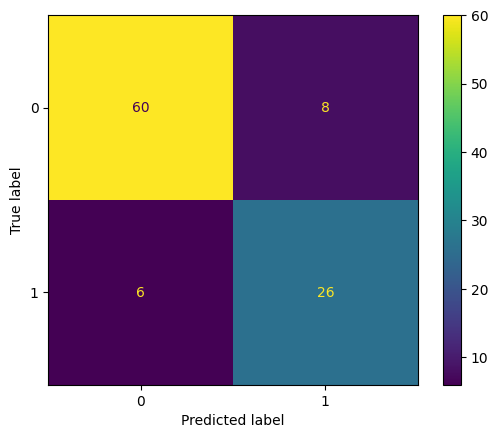

In [64]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)

## Visualising the Training set results

## Creating the Mesh or canvas for the scatter plot

To visualize the results we can create a mesh of points whose boundaries come from the maximun and minimun values of the two selected features: 1) Age and 2) Estimated Salary

In [65]:
print(X_train[:10]) # Data we will use to create the mesh

[[ 0.59531408  1.95866234]
 [-0.71170063 -0.23323283]
 [ 0.22188131 -0.37556368]
 [-0.15155147  1.36087275]
 [-0.89841702 -0.9448871 ]
 [ 1.15546324 -0.74562391]
 [-1.83199895 -0.0624358 ]
 [-0.80505882  0.27915825]
 [ 0.3152395   0.05142888]
 [-0.15155147  2.1009932 ]]


In [66]:
# Create a mesh to plot in, allow for a 1 unit thickness frame
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1 #take feature 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1 #take feature 2
# Let us make a rectangle bounded by the minimun and maximun values
# Include numbers in between separated by 0.1 units
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [67]:
print("the following mesh has",len(xx),"X values, with",len(yy), "Y values")

the following mesh has 59 X values, with 59 Y values


We have the grid ready, now we need to identify the decision boundary.


In [68]:
xx_ravel = xx.ravel()
# instead of a 59 row matrix we need a single list of values
# notice -2.831 repeats after 60 items, evidence of the rows being appended to
# each other
print(xx_ravel[:62])

[-2.83199895 -2.73199895 -2.63199895 -2.53199895 -2.43199895 -2.33199895
 -2.23199895 -2.13199895 -2.03199895 -1.93199895 -1.83199895 -1.73199895
 -1.63199895 -1.53199895 -1.43199895 -1.33199895 -1.23199895 -1.13199895
 -1.03199895 -0.93199895 -0.83199895 -0.73199895 -0.63199895 -0.53199895
 -0.43199895 -0.33199895 -0.23199895 -0.13199895 -0.03199895  0.06800105
  0.16800105  0.26800105  0.36800105  0.46800105  0.56800105  0.66800105
  0.76800105  0.86800105  0.96800105  1.06800105  1.16800105  1.26800105
  1.36800105  1.46800105  1.56800105  1.66800105  1.76800105  1.86800105
  1.96800105  2.06800105  2.16800105  2.26800105  2.36800105  2.46800105
  2.56800105  2.66800105  2.76800105  2.86800105  2.96800105  3.06800105
 -2.83199895 -2.73199895]


In [69]:
# take a look at the shape of the matrix
print(xx.shape)
print(yy.shape)

(59, 60)
(59, 60)


## Get the decision boundary using the classifier

In [70]:
# Predict the function value for the whole grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]) # Use 2D input, concatenate
print("Classifying",len(Z),"data points")
Z = Z.reshape(xx.shape)
print("Shape of the final product",Z.shape)
print("Finally we show the result for the first row of classified datapoints")
Z[1]

Classifying 3540 data points
Shape of the final product (59, 60)
Finally we show the result for the first row of classified datapoints


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Inverse transform

In [71]:
np.set_printoptions(suppress=True)
print("this is how the data should look at the end")
print(X[:5])
# Inverse transform
points_to_plot = sc.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
print("this is how the data looks after inverse transform")
print(points_to_plot[:5])
print("We expect the X values to be like this in the end")
print(xx[0])

this is how the data should look at the end
[[   19. 19000.]
 [   35. 20000.]
 [   26. 43000.]
 [   27. 57000.]
 [   19. 76000.]]
this is how the data looks after inverse transform
[[     7.28856737 -20129.41723905]
 [     8.35971064 -20129.41723905]
 [     9.4308539  -20129.41723905]
 [    10.50199716 -20129.41723905]
 [    11.57314042 -20129.41723905]]
We expect the X values to be like this in the end
[-2.83199895 -2.73199895 -2.63199895 -2.53199895 -2.43199895 -2.33199895
 -2.23199895 -2.13199895 -2.03199895 -1.93199895 -1.83199895 -1.73199895
 -1.63199895 -1.53199895 -1.43199895 -1.33199895 -1.23199895 -1.13199895
 -1.03199895 -0.93199895 -0.83199895 -0.73199895 -0.63199895 -0.53199895
 -0.43199895 -0.33199895 -0.23199895 -0.13199895 -0.03199895  0.06800105
  0.16800105  0.26800105  0.36800105  0.46800105  0.56800105  0.66800105
  0.76800105  0.86800105  0.96800105  1.06800105  1.16800105  1.26800105
  1.36800105  1.46800105  1.56800105  1.66800105  1.76800105  1.86800105
  1.96800

In [72]:
# X values look like this
print(points_to_plot[:10,0])
print("-----------")
# Y values look like this
print(points_to_plot[:10,1])

[ 7.28856737  8.35971064  9.4308539  10.50199716 11.57314042 12.64428369
 13.71542695 14.78657021 15.85771347 16.92885674]
-----------
[-20129.41723905 -20129.41723905 -20129.41723905 -20129.41723905
 -20129.41723905 -20129.41723905 -20129.41723905 -20129.41723905
 -20129.41723905 -20129.41723905]


In [73]:
printable_x = points_to_plot[:,0].reshape(59,60)
printable_y = points_to_plot[:,1].reshape(59,60)
print(printable_x[1])
print("-----")
print(printable_y[1])

[ 7.28856737  8.35971064  9.4308539  10.50199716 11.57314042 12.64428369
 13.71542695 14.78657021 15.85771347 16.92885674 18.         19.07114326
 20.14228653 21.21342979 22.28457305 23.35571631 24.42685958 25.49800284
 26.5691461  27.64028936 28.71143263 29.78257589 30.85371915 31.92486241
 32.99600568 34.06714894 35.1382922  36.20943546 37.28057873 38.35172199
 39.42286525 40.49400851 41.56515178 42.63629504 43.7074383  44.77858156
 45.84972483 46.92086809 47.99201135 49.06315461 50.13429788 51.20544114
 52.2765844  53.34772766 54.41887093 55.49001419 56.56115745 57.63230071
 58.70344398 59.77458724 60.8457305  61.91687376 62.98801703 64.05916029
 65.13030355 66.20144681 67.27259008 68.34373334 69.4148766  70.48601986]
-----
[-16616.47551515 -16616.47551515 -16616.47551515 -16616.47551515
 -16616.47551515 -16616.47551515 -16616.47551515 -16616.47551515
 -16616.47551515 -16616.47551515 -16616.47551515 -16616.47551515
 -16616.47551515 -16616.47551515 -16616.47551515 -16616.47551515
 -1

In [74]:
scatter_X_train = sc.inverse_transform(X_train)

## Plot

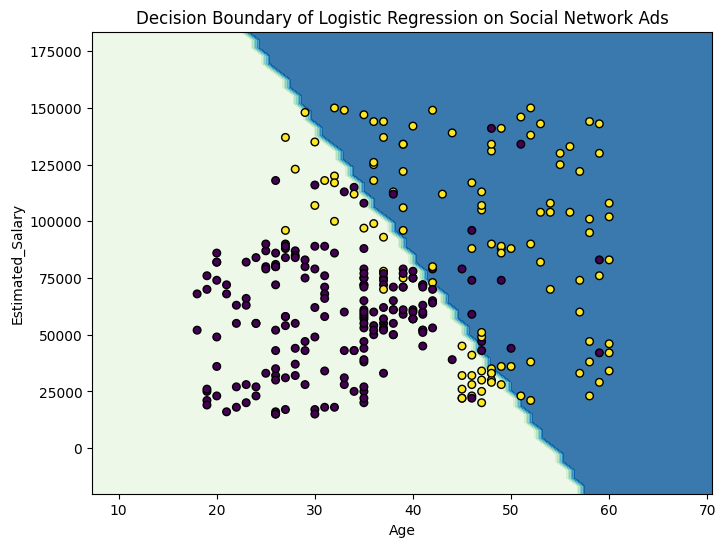

In [75]:
# Plot the contour and training examples
plt.figure(figsize=(8, 6))
plt.contourf(printable_x,printable_y, Z, alpha=.8, cmap='GnBu')
plt.scatter(scatter_X_train[:, 0], scatter_X_train[:, 1],c=y_train, edgecolors='k', s=30)
plt.xlabel('Age')
plt.ylabel('Estimated_Salary')
plt.title('Decision Boundary of Logistic Regression on Social Network Ads')
plt.show()

## Reference

https://vitalflux.com/plot-decision-boundary-using-logistic-regression-python-example/